# Classificação: Primeiros passos

Neste projeto, iremos analisar dados de uma campanha de marketing para aderência de investimentos. O intuito é usar as informações dos dados para prever se os clientes de um banco vão aplicar o dinheiro em um investimento ou não.

Essa previsão será feita utilizando machine learning e este notebook vai conter os passos para se obter um modelo capaz de realizar as previsões, desde a **leitura**, **análise exploratória**, **separação** e **transformação** dos dados, até o **ajuste**, **avaliação** e **comparação** de modelos de classificação.

# Análise exploratória

## Fazendo a leitura dos dados

Podemos realizar a leitura dos dados a partir da biblioteca `pandas`. Por conta disso, vamos realizar a importação da biblioteca com o comando `import pandas as pd`.

Como o arquivo de dados está no formato *csv*, vamos realizar a leitura com a função [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/marketing_investimento.csv')
dados.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [3]:
dados.shape

(1268, 9)

Para criar modelos de classificação, precisamos utilizar dados de qualidade, sem inconsistências e sem dados faltantes. Vamos checar se existem dados nulos e o tipo dos dados de cada coluna na base de dados a partir do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html).

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


# Variáveis Categóricas

In [5]:
import plotly.express as px

In [6]:
px.histogram(dados, x = 'aderencia_investimento', text_auto=True)

In [7]:
px.histogram(dados, x = 'estado_civil', text_auto=True, color='aderencia_investimento', barmode = 'group')

In [8]:
px.histogram(dados, x = 'escolaridade', text_auto=True, color='aderencia_investimento', barmode = 'group')

In [9]:
px.histogram(dados, x = 'inadimplencia', text_auto=True, color='aderencia_investimento', barmode = 'group')

In [10]:
px.histogram(dados, x = 'fez_emprestimo', text_auto=True, color='aderencia_investimento', barmode = 'group')

# Variáveis numéricas

In [11]:
px.box(dados, x='idade', color='aderencia_investimento')

In [12]:
px.box(dados, x='saldo', color='aderencia_investimento')

In [13]:
px.box(dados, x='tempo_ult_contato', color='aderencia_investimento')

In [14]:
px.box(dados, x='numero_contatos', color='aderencia_investimento')

# Transformação de Dados

In [15]:
y = dados['aderencia_investimento']
X = dados.drop('aderencia_investimento',axis=1)

In [17]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [19]:
colunas = X.columns

In [21]:
one_hot = make_column_transformer((
    OneHotEncoder(drop = 'if_binary'),
    ['estado_civil','escolaridade','inadimplencia','fez_emprestimo']
    ),
    remainder = 'passthrough',
    sparse_threshold=0)

In [22]:
X = one_hot.fit_transform(X)

In [24]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [31]:
X = pd.DataFrame(X, columns=one_hot.get_feature_names_out(colunas))
X.head()

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0


In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
label_encoder = LabelEncoder()

In [34]:
y = label_encoder.fit_transform(y)

In [35]:
y

array([1, 1, 0, ..., 1, 1, 1])

# Ajustando Modelos

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, stratify=y, random_state = 5)

In [38]:
from sklearn.dummy import DummyClassifier

In [39]:
dummy = DummyClassifier()
dummy.fit(X_treino,y_treino)

dummy.score(X_teste,y_teste)

0.6025236593059937

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
tree = DecisionTreeClassifier(random_state=5)
tree.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [43]:
tree.predict(X_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [44]:
tree.score(X_teste,y_teste)

0.6656151419558359

In [46]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

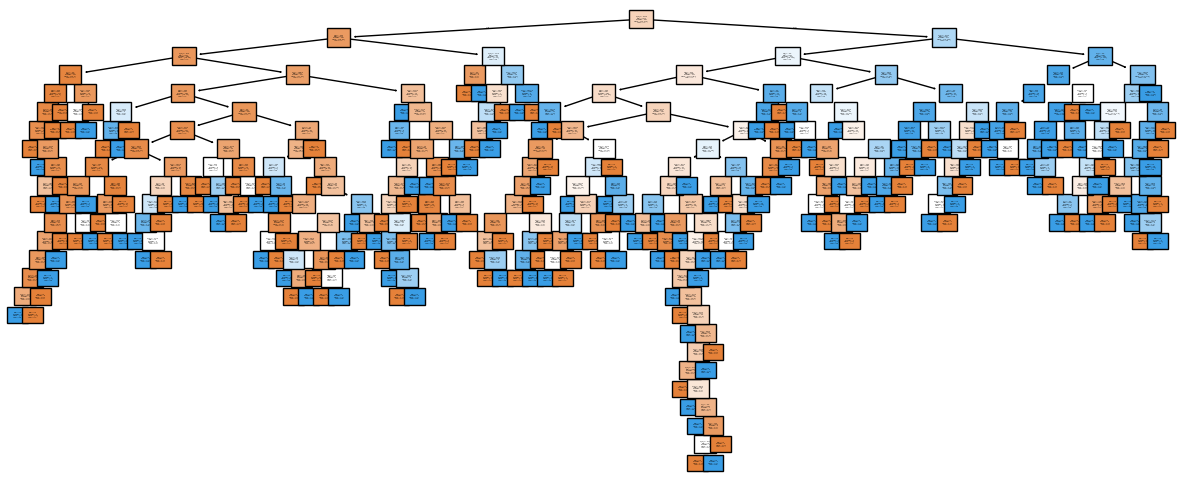

In [48]:
plt.figure(figsize=(15,6))
plot_tree(tree, filled=True, class_names=['nao','sim'],fontsize=1,);

In [49]:
tree.score(X_treino,y_treino)

1.0

In [50]:
tree = DecisionTreeClassifier(max_depth=3,random_state=5)
tree.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [51]:
tree.score(X_treino,y_treino)

0.7613038906414301

In [52]:
tree.score(X_teste,y_teste)

0.7160883280757098

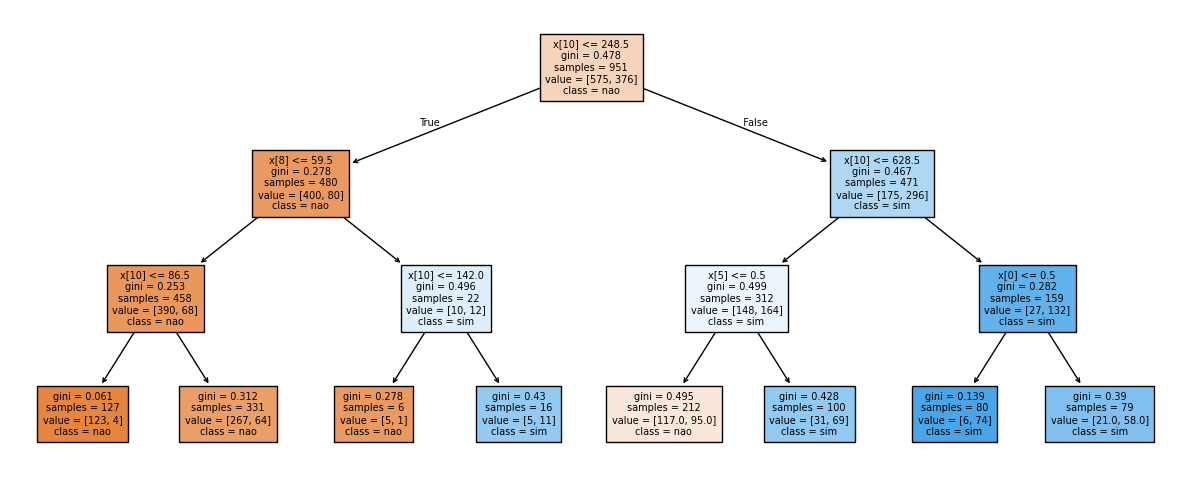

In [53]:
plt.figure(figsize=(15,6))
plot_tree(tree, filled=True, class_names=['nao','sim'],fontsize=7,);